
### Exploration of the boston_2016 bluebikes dataset for cleaning preparation


In [1]:
# from WS_05

# import all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

import folium
from folium import plugins
from folium.plugins import HeatMap

import math
import random

from datetime import date, time, datetime, timedelta

In [2]:
### read in Boston Bike data to a Dataframe

boston = pd.read_csv("boston_2016.csv")

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_time          1236203 non-null  object
 1   end_time            1236203 non-null  object
 2   start_station_id    1236203 non-null  int64 
 3   end_station_id      1236203 non-null  int64 
 4   start_station_name  1236203 non-null  object
 5   end_station_name    1236203 non-null  object
 6   bike_id             1236203 non-null  int64 
 7   user_type           1236203 non-null  object
dtypes: int64(3), object(5)
memory usage: 75.5+ MB


In [4]:
boston.isna().sum()

start_time            0
end_time              0
start_station_id      0
end_station_id        0
start_station_name    0
end_station_name      0
bike_id               0
user_type             0
dtype: int64

### 0 null values in the dataset

In [5]:
### change boston start_time and end_time from object to datetime, remove microseconds

boston["start_time"] = pd.to_datetime(boston["start_time"])
boston["start_time"] = boston["start_time"].apply(lambda x: x.replace(microsecond = 0))

boston["end_time"] = pd.to_datetime(boston["end_time"])
boston["end_time"] = boston["end_time"].apply(lambda x: x.replace(microsecond = 0))
boston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer
...,...,...,...,...,...,...,...,...
1236198,2016-12-31 23:01:46,2016-12-31 23:14:20,8,33,Union Square - Brighton Ave at Cambridge St,Kenmore Square,230,Subscriber
1236199,2016-12-31 23:14:21,2016-12-31 23:18:03,190,6,Nashua Street at Red Auerbach Way,Cambridge St at Joy St,1420,Subscriber
1236200,2016-12-31 23:15:38,2016-12-31 23:24:43,33,36,Kenmore Square,Copley Square - Dartmouth St at Boylston St,230,Subscriber
1236201,2016-12-31 23:20:35,2016-12-31 23:27:58,90,141,Lechmere Station at Cambridge St / First St,Kendall Street,74,Subscriber


In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1236203 non-null  datetime64[ns]
 1   end_time            1236203 non-null  datetime64[ns]
 2   start_station_id    1236203 non-null  int64         
 3   end_station_id      1236203 non-null  int64         
 4   start_station_name  1236203 non-null  object        
 5   end_station_name    1236203 non-null  object        
 6   bike_id             1236203 non-null  int64         
 7   user_type           1236203 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 75.5+ MB


### Data is sortet by start_time

In [7]:
### add the trip duration as timedelta for each tour

boston["trip_duration"] = boston["end_time"] - boston["start_time"]
boston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41
...,...,...,...,...,...,...,...,...,...
1236198,2016-12-31 23:01:46,2016-12-31 23:14:20,8,33,Union Square - Brighton Ave at Cambridge St,Kenmore Square,230,Subscriber,0 days 00:12:34
1236199,2016-12-31 23:14:21,2016-12-31 23:18:03,190,6,Nashua Street at Red Auerbach Way,Cambridge St at Joy St,1420,Subscriber,0 days 00:03:42
1236200,2016-12-31 23:15:38,2016-12-31 23:24:43,33,36,Kenmore Square,Copley Square - Dartmouth St at Boylston St,230,Subscriber,0 days 00:09:05
1236201,2016-12-31 23:20:35,2016-12-31 23:27:58,90,141,Lechmere Station at Cambridge St / First St,Kendall Street,74,Subscriber,0 days 00:07:23


In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1236203 non-null  datetime64[ns] 
 1   end_time            1236203 non-null  datetime64[ns] 
 2   start_station_id    1236203 non-null  int64          
 3   end_station_id      1236203 non-null  int64          
 4   start_station_name  1236203 non-null  object         
 5   end_station_name    1236203 non-null  object         
 6   bike_id             1236203 non-null  int64          
 7   user_type           1236203 non-null  object         
 8   trip_duration       1236203 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 84.9+ MB


### Gather information

In [9]:
boston.nunique()

start_time            1176852
end_time              1175109
start_station_id          189
end_station_id            189
start_station_name        276
end_station_name          276
bike_id                  1802
user_type                   2
trip_duration           14031
dtype: int64

### 189 distinct start and end station_ids, but 276 distinct start and end station_names 
### 1802 bike ids
### 2 User types

In [10]:
boston.groupby('start_station_id').start_station_name.nunique()

start_station_id
1      1
3      2
4      2
5      2
6      2
      ..
215    2
216    1
217    1
218    2
219    2
Name: start_station_name, Length: 189, dtype: int64

In [11]:
boston.groupby('start_station_id').start_station_name.unique()

start_station_id
1                                [18 Dorrance Warehouse]
3      [Colleges of the Fenway, Colleges of the Fenwa...
4      [Tremont St. at Berkeley St., Tremont St at E ...
5      [Northeastern U / North Parking Lot, Northeast...
6      [Cambridge St. at Joy St., Cambridge St at Joy...
                             ...                        
215    [The Eddy at New Street, The Eddy - New St at ...
216                            [Glendon St at Condor St]
217    [Orient Heights T Stop - Bennington St at Sara...
218    [Watermark Seaport, Watermark Seaport - Boston...
219    [Central Square East Boston - Porter Street at...
Name: start_station_name, Length: 189, dtype: object

### Some station ids have 2 station names assigned, possibly because they were renamed
### for example The Eddy at New Street and The Eddy - New St at Sumemer St with station_id 215

### trip duration analysis

In [12]:
print(boston["trip_duration"].max())

346 days 03:14:39


In [13]:
print(boston["trip_duration"].min())

-1 days +23:06:24


In [14]:
print(boston["trip_duration"].mean())

0 days 00:22:45.223969687


### max trip duration almost a year and min duration negative, cleaning needed

https://help.bluebikes.com/hc/en-us/articles/360034926492-How-long-can-I-keep-a-bike-out-
https://help.bluebikes.com/hc/en-us/articles/360034926452-What-if-I-keep-a-bike-out-too-long-

### longest pass allows 2 hours, every 30 minutes cost extra 2,5 or 2$ (Income eligible members)
### single rides 30 min
### monthly and anual membership 45 min 
### adventure pass up to 2 hours
### Income eligible members (qualified for a discounted monthly or annual memberships) 60 min

### if the bike is not returned after 24 hours, a stolen/lost bike fee will be charged of 1200$ + tax



In [15]:
### define some timedeltas for trip_duration check

### time_delta for 0 Minutes
date1 = pd.Timedelta(pd.offsets.Minute(0))

### time_delta for 2 Hours
date2 = pd.Timedelta(pd.offsets.Hour(2))

### time_delta for 1 Day
date3 = pd.Timedelta(pd.offsets.Day(1))


In [16]:
### nb. of trips over 24 hours
len(boston.loc[boston.trip_duration > date3])

1079

In [17]:
### nb. of trips with negaive time
len(boston.loc[boston.trip_duration < date1])

3

In [18]:
### nb. of trips over 2 hours 
len(boston.loc[boston.trip_duration > date2])

8627

In [19]:
### nb. of trips over 2 hours and under 24 hours
print((len(boston.loc[boston.trip_duration > date2]) - len(boston.loc[boston.trip_duration > date3]) ))

7548


### remove negative trip duration and the trips over 24 hours

In [20]:
bostonC = boston[(boston["trip_duration"] > date1) & (boston["trip_duration"] < date3)]
bostonC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235121 entries, 0 to 1236202
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1235121 non-null  datetime64[ns] 
 1   end_time            1235121 non-null  datetime64[ns] 
 2   start_station_id    1235121 non-null  int64          
 3   end_station_id      1235121 non-null  int64          
 4   start_station_name  1235121 non-null  object         
 5   end_station_name    1235121 non-null  object         
 6   bike_id             1235121 non-null  int64          
 7   user_type           1235121 non-null  object         
 8   trip_duration       1235121 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 94.2+ MB


In [21]:
print(bostonC["trip_duration"].max())

0 days 23:56:42


In [22]:
print(bostonC["trip_duration"].min())

0 days 00:01:01


In [23]:
print(bostonC["trip_duration"].mean())

0 days 00:15:55.161627079


In [24]:
### nb. of trips over 2 hours 
len(bostonC.loc[bostonC.trip_duration > date2])

7548

In [25]:
### nb. of trips over 3 hours 

date4 = pd.Timedelta(pd.offsets.Hour(3))

len(bostonC.loc[bostonC.trip_duration > date4])

4297

In [26]:
### nb. of trips over 4 hours 

date5 = pd.Timedelta(pd.offsets.Hour(4))

len(bostonC.loc[bostonC.trip_duration > date5])

2973

In [27]:
### nb. of trips over 5 hours 

date6 = pd.Timedelta(pd.offsets.Hour(5))

len(bostonC.loc[bostonC.trip_duration > date6])

2295

In [28]:
### nb. of trips over 6 hours 

date7 = pd.Timedelta(pd.offsets.Hour(6))

len(bostonC.loc[bostonC.trip_duration > date7])

1917

### ---

In [29]:
# Let's map time of day and day of week to our DF

def get_date (ts):
    return ts.date()

def get_month (ts):
    return ts.month()

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour

def get_minute (ts):
    return ts.minute

In [30]:
### add date, weekday, hour and minute from start_time
#bostonC["date"] = bostonC["start_time"].apply(lambda ts: get_date (ts))
#bostonC["weekday"] = bostonC["start_time"].apply(lambda ts: get_weekday (ts))


#bostonC["hour"] = bostonC["start_time"].apply(lambda x: get_hour (x))

#bostonC["minute"] = bostonC["start_time"].apply(lambda x: get_minute (x))

#### SettingWithCopyWarning

In [31]:

bostonC["date"] = pd.DatetimeIndex(bostonC["start_time"]).date
bostonC["month"] = pd.DatetimeIndex(bostonC["start_time"]).month
bostonC["weekday"] = pd.DatetimeIndex(bostonC["start_time"]).weekday
bostonC["hour"] = pd.DatetimeIndex(bostonC["start_time"]).hour
bostonC["minute"] = pd.DatetimeIndex(bostonC["start_time"]).minute





<ipython-input-31-25c044352f2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bostonC["date"] = pd.DatetimeIndex(bostonC["start_time"]).date
<ipython-input-31-25c044352f2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bostonC["month"] = pd.DatetimeIndex(bostonC["start_time"]).month
<ipython-input-31-25c044352f2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [32]:
bostonC["date"] = pd.to_datetime(bostonC["date"])

<ipython-input-32-5f61653f812c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bostonC["date"] = pd.to_datetime(bostonC["date"])


In [33]:
bostonC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235121 entries, 0 to 1236202
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1235121 non-null  datetime64[ns] 
 1   end_time            1235121 non-null  datetime64[ns] 
 2   start_station_id    1235121 non-null  int64          
 3   end_station_id      1235121 non-null  int64          
 4   start_station_name  1235121 non-null  object         
 5   end_station_name    1235121 non-null  object         
 6   bike_id             1235121 non-null  int64          
 7   user_type           1235121 non-null  object         
 8   trip_duration       1235121 non-null  timedelta64[ns]
 9   date                1235121 non-null  datetime64[ns] 
 10  month               1235121 non-null  int64          
 11  weekday             1235121 non-null  int64          
 12  hour                1235121 non-null  int64          
 1

In [34]:
bostonC

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration,date,month,weekday,hour,minute
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19,2016-01-01,1,4,0,8
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08,2016-01-01,1,4,0,8
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14,2016-01-01,1,4,0,10
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49,2016-01-01,1,4,0,10
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41,2016-01-01,1,4,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236198,2016-12-31 23:01:46,2016-12-31 23:14:20,8,33,Union Square - Brighton Ave at Cambridge St,Kenmore Square,230,Subscriber,0 days 00:12:34,2016-12-31,12,5,23,1
1236199,2016-12-31 23:14:21,2016-12-31 23:18:03,190,6,Nashua Street at Red Auerbach Way,Cambridge St at Joy St,1420,Subscriber,0 days 00:03:42,2016-12-31,12,5,23,14
1236200,2016-12-31 23:15:38,2016-12-31 23:24:43,33,36,Kenmore Square,Copley Square - Dartmouth St at Boylston St,230,Subscriber,0 days 00:09:05,2016-12-31,12,5,23,15
1236201,2016-12-31 23:20:35,2016-12-31 23:27:58,90,141,Lechmere Station at Cambridge St / First St,Kendall Street,74,Subscriber,0 days 00:07:23,2016-12-31,12,5,23,20


### plot some data

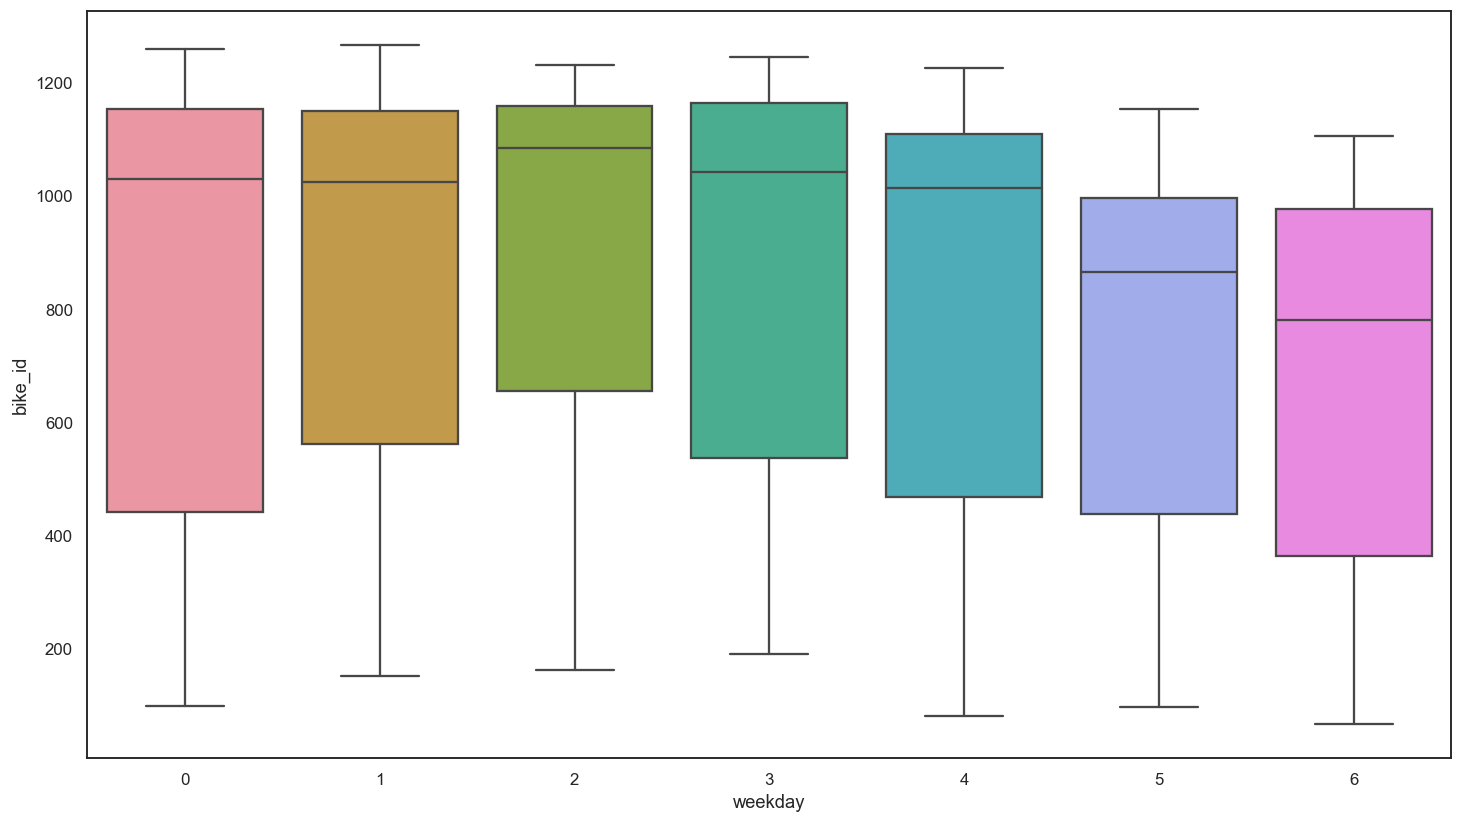

In [40]:
### bikes used per weekday

bostonC_used = bostonC.groupby(["date", "weekday"])["bike_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["bike_id"],ax=ax)
plt.show()


In [169]:
bostonC["weekday"].value_counts()

2    202905
3    199816
4    190813
1    190235
0    179028
5    144045
6    128279
Name: weekday, dtype: int64

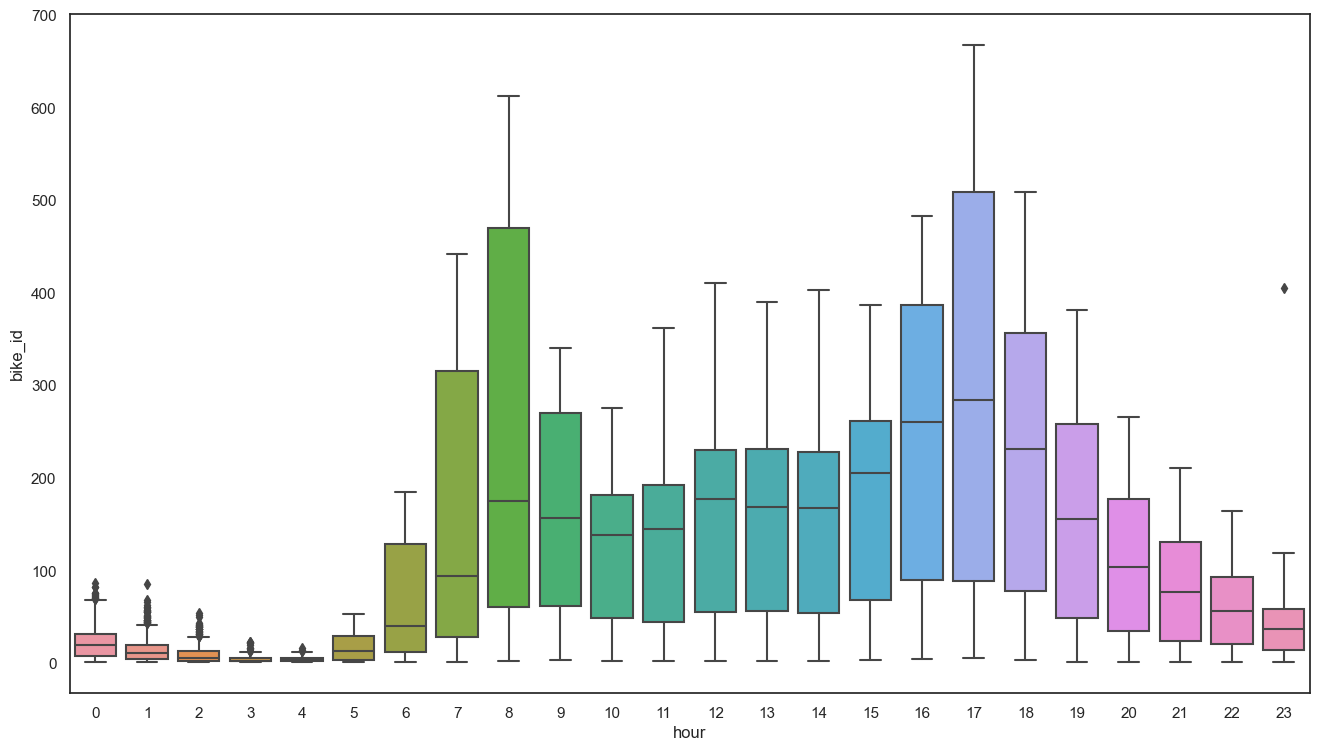

In [65]:
### bikes used per hour

bostonC_used = bostonC.groupby(["date", "hour"])["bike_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=100) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["bike_id"],ax=ax)
plt.show()


In [168]:
bostonC["hour"].value_counts()

17    142069
8     113589
16    106857
18    103373
15     75966
19     70553
9      69307
7      67316
12     67298
13     67166
14     66003
11     56706
10     51275
20     48314
21     34431
6      26118
22     25172
23     16234
0       9240
1       5894
5       5825
2       3636
3       1442
4       1337
Name: hour, dtype: int64

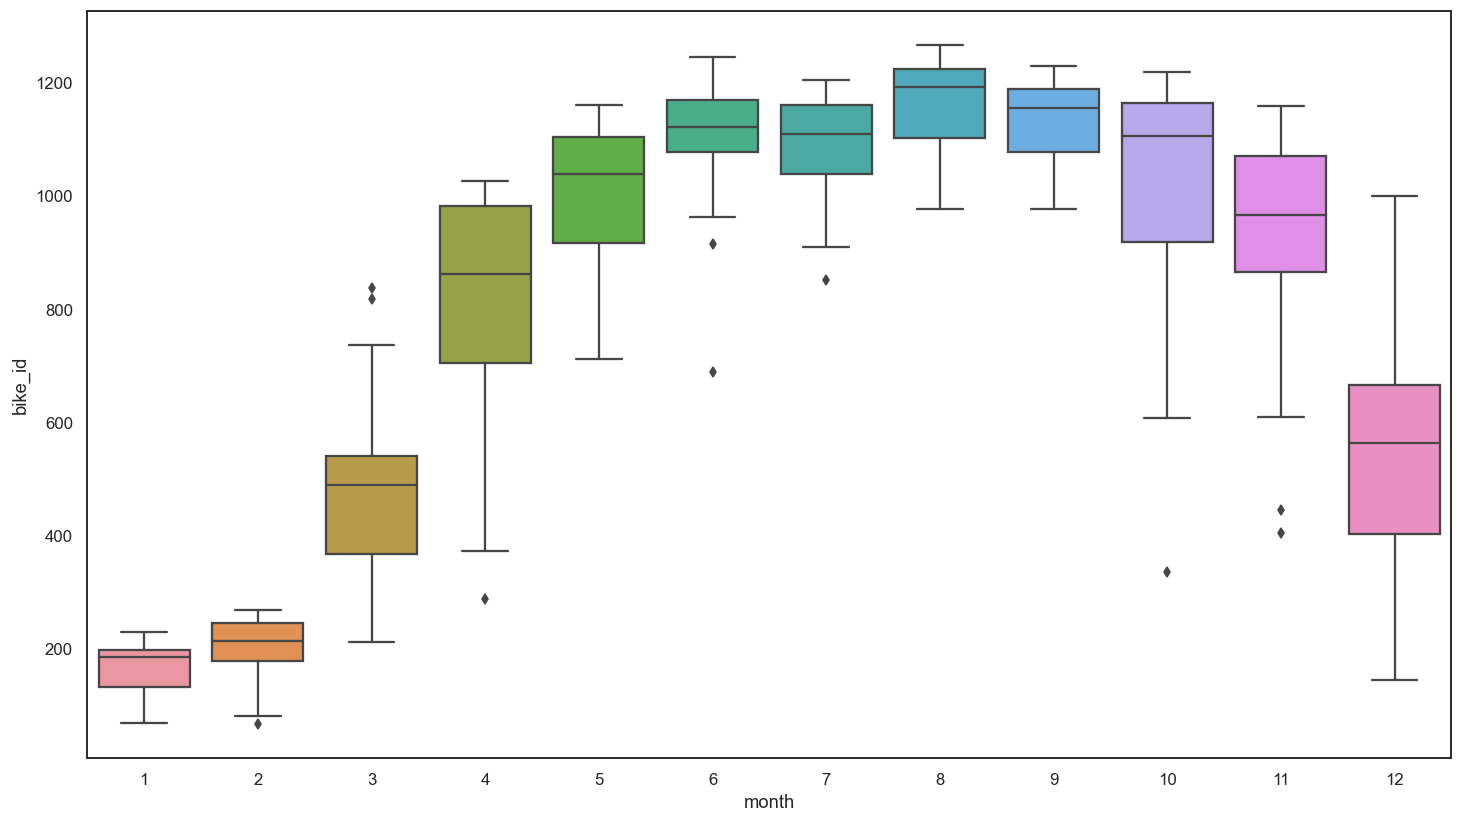

In [42]:
### bikes used per month

bostonC_used = bostonC.groupby(["date", "month"])["bike_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["bike_id"],ax=ax)
plt.show()


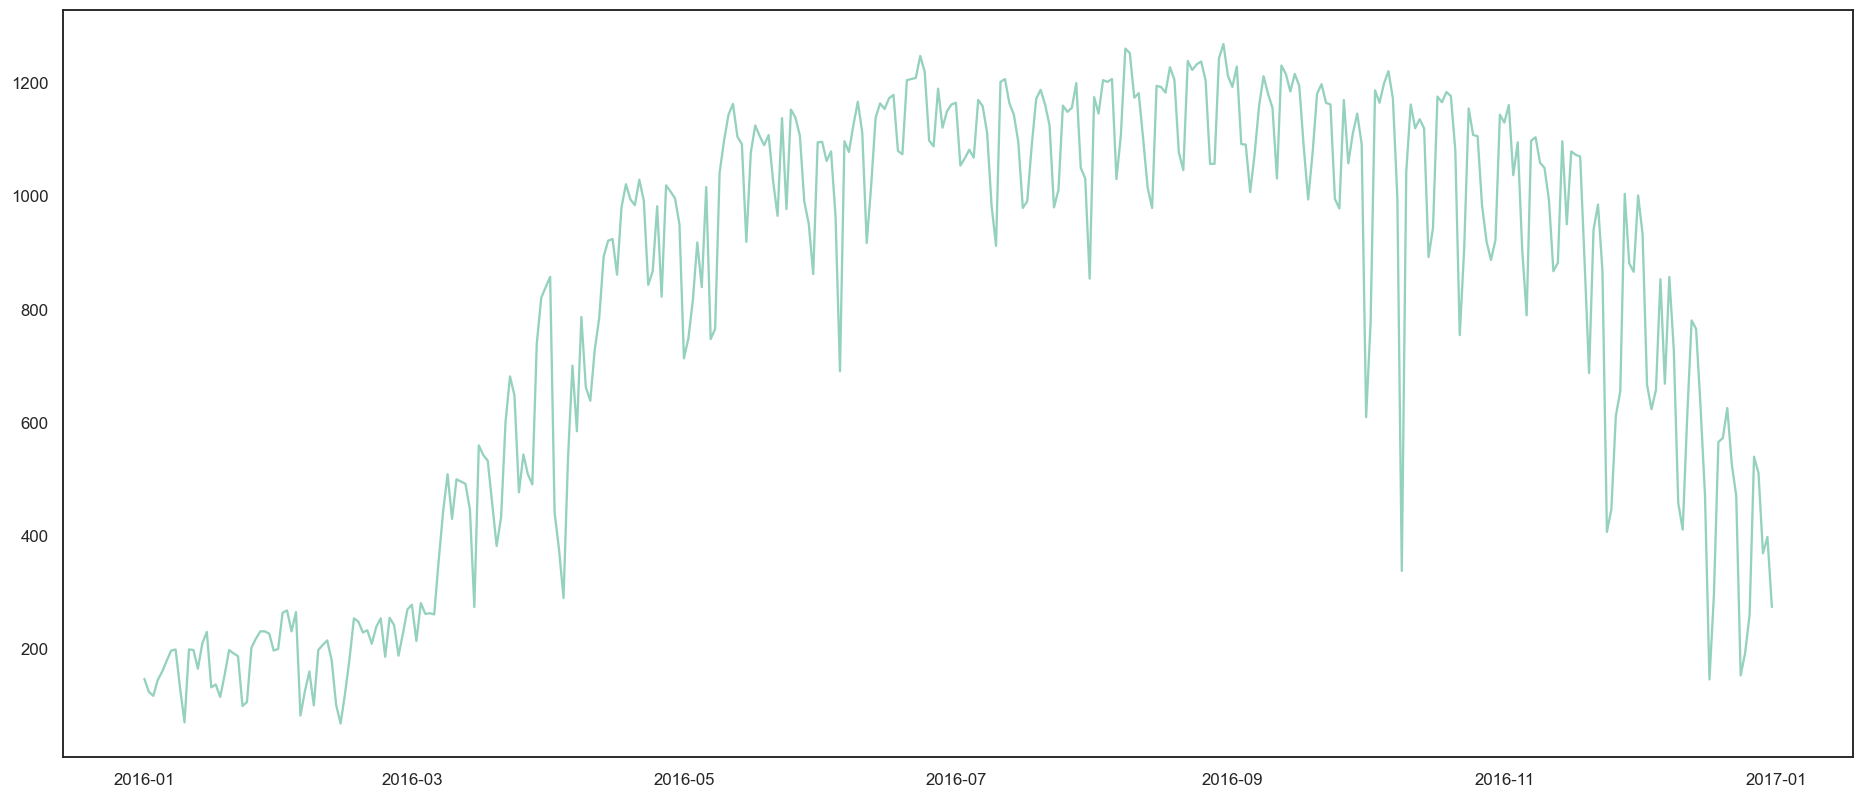

In [150]:
### bikes used 

bostonC_used = bostonC.groupby(["date"])["bike_id"].nunique()
#bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(21,9), dpi=110) 

ax.plot(bostonC_used)

plt.show()

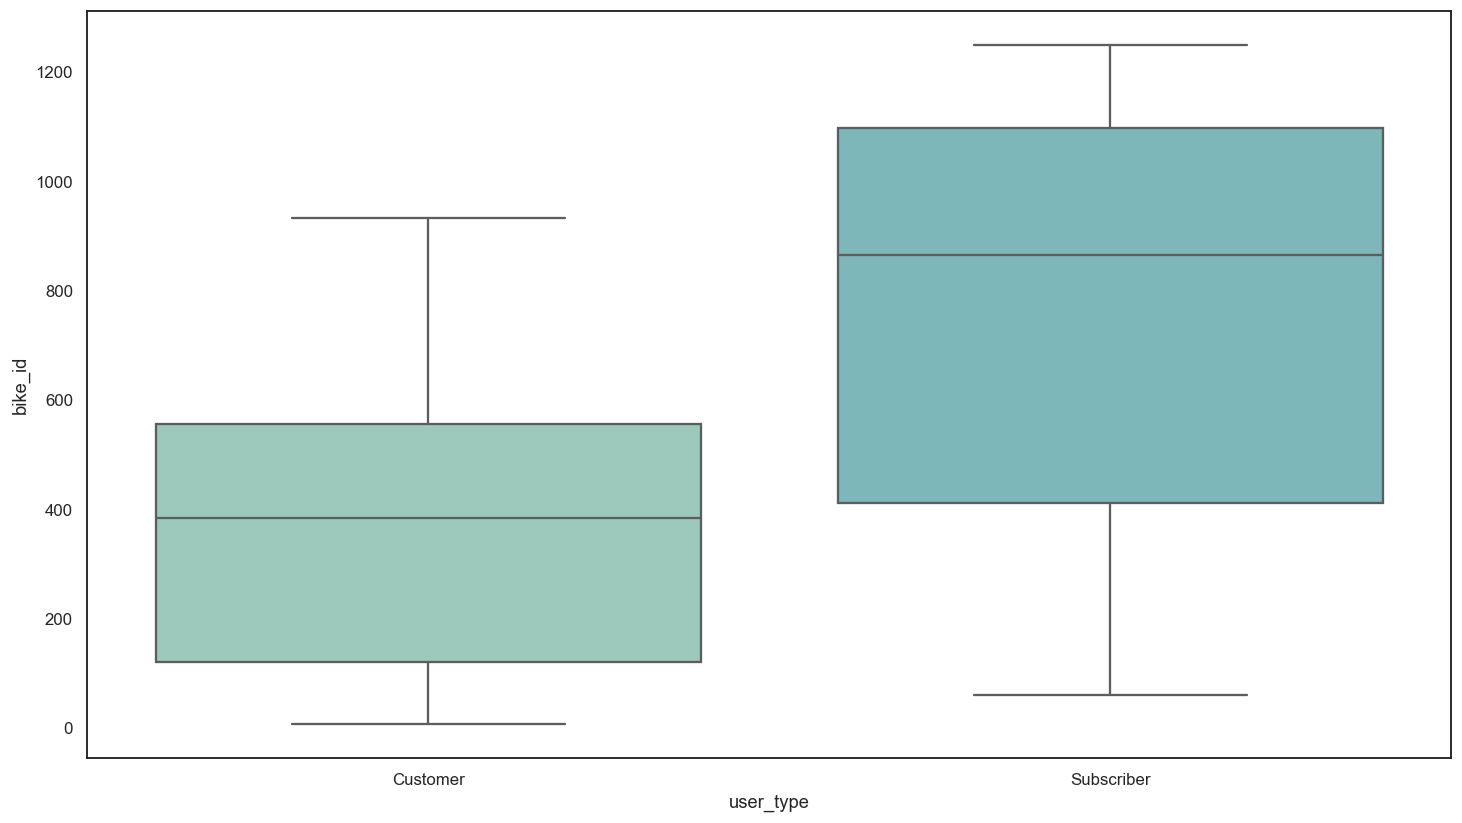

In [151]:
### bikes used per usertype

bostonC_used = bostonC.groupby(["date","user_type"])["bike_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["bike_id"],ax=ax)
plt.show()


In [130]:
#len(bostonC.loc[bostonC.start_station_id == 3])
bostonC["start_station_id"].value_counts()


67     35638
22     31507
68     24106
74     23159
80     21175
       ...  
216       43
209       31
219       23
153        2
158        1
Name: start_station_id, Length: 189, dtype: int64

In [91]:
bostonC["trip_id"] = range(1, len(bostonC) +1)
bostonC

<ipython-input-91-db5f132f1f2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bostonC["trip_id"] = range(1, len(bostonC) +1)


,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration,date,month,weekday,hour,minute,trip_id
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19,2016-01-01,1,4,0,8,1
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08,2016-01-01,1,4,0,8,2
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14,2016-01-01,1,4,0,10,3
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49,2016-01-01,1,4,0,10,4
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41,2016-01-01,1,4,0,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236198,2016-12-31 23:01:46,2016-12-31 23:14:20,8,33,Union Square - Brighton Ave at Cambridge St,Kenmore Square,230,Subscriber,0 days 00:12:34,2016-12-31,12,5,23,1,1235117
1236199,2016-12-31 23:14:21,2016-12-31 23:18:03,190,6,Nashua Street at Red Auerbach Way,Cambridge St at Joy St,1420,Subscriber,0 days 00:03:42,2016-12-31,12,5,23,14,1235118
1236200,2016-12-31 23:15:38,2016-12-31 23:24:43,33,36,Kenmore Square,Copley Square - Dartmouth St at Boylston St,230,Subscriber,0 days 00:09:05,2016-12-31,12,5,23,15,1235119
1236201,2016-12-31 23:20:35,2016-12-31 23:27:58,90,141,Lechmere Station at Cambridge St / First St,Kendall Street,74,Subscriber,0 days 00:07:23,2016-12-31,12,5,23,20,1235120
